# BTV Screen inserted during the HEARTS nov 2023 run

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# source the nxcals python libs
from nxcals.api.extraction.data.builders import *
from datetime import datetime
from datetime import timedelta
import pickle
from matplotlib import gridspec
import seaborn as sns

In [7]:
# Build the query and load data into spark dataframe UTC Time
start = "2023-10-16 09:00:00.000"
end = "2023-11-02 18:00:00.000"

btv_list = [ "F61.BTV012/Image",
            "F62.BTV002/Image",
            "T8.BTV020/Image",
            "T8.BTV035/Image",
           ]

df_big = pd.DataFrame()
for btv in btv_list:
    df = DevicePropertyDataQuery.builder(spark).system("CMW").startTime(start).endTime(end).entity().parameter(btv).build()
    df = df.select('acqStamp', 'screenSelect').toPandas()
    df["timestamp"] = pd.to_datetime(df['acqStamp'], unit='ns')
    df.sort_values(by="timestamp", inplace=True)
    df_big = pd.concat([df_big,df])

23/11/14 09:11:13 WARN URLConfigurationSource: No URLs will be polled as dynamic configuration sources.
23/11/14 09:11:22 WARN CheckAllocator: More than one DefaultAllocationManager on classpath. Choosing first found


(array([  14.,    0.,    0.,    0.,    0., 3411.,    0.,    0.,    0.,
        3566.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

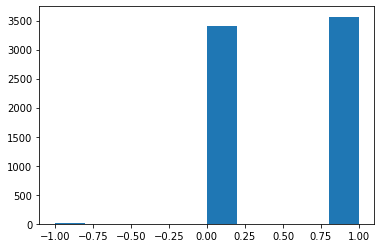

In [8]:
fig, ax = plt.subplots()
ax.hist(df_big.screenSelect)

In [12]:
df_btv_screenSelect = df_big.where(df_big.screenSelect == 1)
df_btv_screenSelect = df_btv_screenSelect.dropna().reset_index()

In [13]:
with open('btv_screenSelect.pickle', 'wb') as handle:
    pickle.dump(df_btv_screenSelect, handle, protocol=pickle.HIGHEST_PROTOCOL)